<a href="https://colab.research.google.com/github/pranee522/Cricket-Players-Performance-in-IPL-matches/blob/main/fake_news_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
true=pd.read_csv('/content/true.csv')

In [3]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
true.shape

(21417, 4)

In [5]:
fake=pd.read_csv('/content/fake.csv')

In [6]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
true['label']=1
fake['label']=0

In [8]:
frames = [true.loc[:5000][:], fake.loc[:5000][:]]

In [9]:
df=pd.concat(frames)

In [10]:
df.shape

(10002, 5)

In [11]:
x=df.drop('label',axis=1)
y=df['label']

In [12]:
df=df.dropna()
df2=df.copy()

In [13]:

df2.reset_index(inplace=True)
df2.head()

,index,title,text,subject,date,label
0,0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [14]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [15]:
import re
import nltk
nltk.download('stopwords')
corpus = []
for i in range(0,len(df2)):
  review=re.sub('[^a-zA-Z]', ' ', df2['text'][i])
  review=review.lower()
  review=review.split()
  review=[ps.stem(word) for word in review if not word in stopwords.words('english')]
  review=' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
#TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000,ngram_range=(1,3))

In [17]:
x=tfidf_v.fit_transform(corpus).toarray()
y=df2['label']

In [18]:
#divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)

In [20]:
from sklearn import metrics
import numpy as np
import itertools
classifier.fit(x_train,y_train)
pred = classifier.predict(x_test)
score=metrics.accuracy_score(y_test,pred)
print("accuracy: %0.3f" % score)

accuracy: 0.999


In [21]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm,classes,normalize=False,title='confusion matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  if normalize:
    cm=cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('confusion matrix,without normalization')
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,cm[i,j],
             horizontalalignment="center",
             color='white' if cm[i,j]> thresh else"black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Preedicted label')


confusion matrix,without normalization


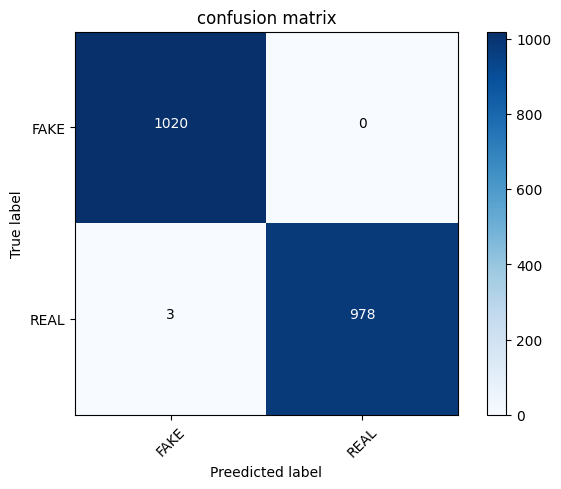

In [22]:
cm=metrics.confusion_matrix(y_test,pred)
plot_confusion_matrix(cm,classes=['FAKE','REAL'])

In [23]:
review  = re.sub('[^a-zA-Z]', ' ', fake['text'][13070])
review = review.lower()
review= review.split()
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'mani c word hillari compet one ouch'

In [24]:
val =tfidf_v.transform([review]).toarray()

In [25]:
classifier.predict(val)

array([0])

In [26]:
#save model and vectorizer
import pickle
pickle.dump(classifier,open('model2.pkl','wb'))
pickle.dump(tfidf_v, open('tfidfvect2.pkl','wb'))

In [27]:
#load model and vectorizer to predict the previous datapoint
joblib_model = pickle.load(open('model2.pkl','rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl','rb'))
val_pkl = joblib_vect.transform([review]).toarray()
test_pred = joblib_model.predict(val_pkl)
if test_pred==0:
  print("Fake News!")
else:
  print("Real News")

Fake News!


In [28]:
fake = pd.read_csv('/content/fake.csv')

In [29]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [30]:
true=pd.read_csv('/content/true.csv')

In [31]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [32]:
fake['class']='fake'
fake.head()

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake


In [33]:
true['class'] ='true'
true.head()

,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",true
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",true
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",true
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",true
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",true


In [34]:
print(fake.shape)
print(true.shape)

(23481, 5)
(21417, 5)


In [35]:
data = pd.concat([fake,true], ignore_index=True)
print(data.shape)

(44898, 5)


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   class    44898 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB


In [37]:
data.duplicated().sum()

209

In [38]:
data.drop_duplicates(inplace=True)

<Axes: >

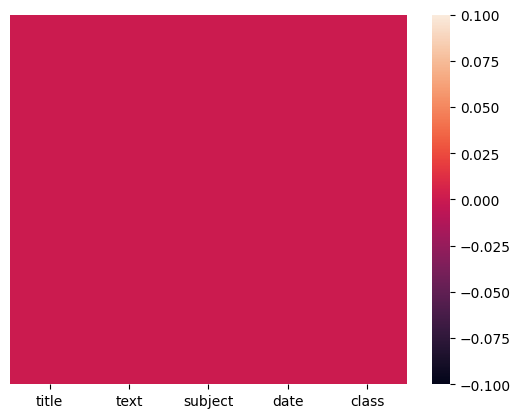

In [39]:
sns.heatmap(data.isnull(),annot=False,yticklabels=False)

In [40]:
data['date'] = pd.to_datetime(data['date'],format='mixed', dayfirst=True,errors='coerce')
data['date'].head()

0   NaT
1   NaT
2   NaT
3   NaT
4   NaT
Name: date, dtype: datetime64[ns]

In [41]:
data['day'] = pd.to_datetime(data['date'],format='mixed',dayfirst=True,errors='coerce').dt.day
data['day'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: day, dtype: float64

In [42]:
data.index = data['date']

In [43]:
data.head()

,title,text,subject,date,class,day
date,,,,,,
NaT,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,NaT,fake,NaN
NaT,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,NaT,fake,NaN
NaT,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,NaT,fake,NaN
NaT,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,NaT,fake,NaN
NaT,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,NaT,fake,NaN


In [61]:
#EDA
fig = px.histogram(data_frame=data,x=data.index,color="subject",marginal='box',pattern_shape='subject')
fig.update_layout(template='plotly_dark',width=1200,title="News subject over the time")

In [62]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots(1,1,specs=[[{'type': 'pie'}]])
labels = data['subject'].value_counts().index.tolist()
values = data['subject'].value_counts().tolist()
fig.add_trace(go.Pie(labels=labels,values=values,hole=0.5,name='subject'))
fig.update_layout(template='plotly_dark',width=1200,title='Distrubtion of subjects in dataset')
fig.show()

In [63]:
import pandas as pd

# Assuming 'data' is your DataFrame
cat = data.groupby("subject")['class'].value_counts().reset_index(name='count')

cat.head()


,subject,class,count
0,Government News,fake,1570
1,Middle-east,fake,778
2,News,fake,9050
3,US_News,fake,783
4,left-news,fake,4459


In [64]:
cat

,subject,class,count
0,Government News,fake,1570
1,Middle-east,fake,778
2,News,fake,9050
3,US_News,fake,783
4,left-news,fake,4459
5,politics,fake,6838
6,politicsNews,true,11220
7,worldnews,true,9991


In [65]:
data

,title,text,subject,date,class,day,words,words_count,length_count
date,,,,,,,,,
NaT,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,NaT,fake,NaN,"[donald, trump, wish, americans, happy, new, y...",282,1830
NaT,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,NaT,fake,NaN,"[house, intelligence, committee, chairman, dev...",184,1379
NaT,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,NaT,fake,NaN,"[friday, revealed, former, milwaukee, sheriff,...",342,2313
NaT,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,NaT,fake,NaN,"[christmas, day, donald, trump, announced, wou...",269,1827
NaT,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,NaT,fake,NaN,"[pope, francis, used, annual, christmas, day, ...",212,1465
...,...,...,...,...,...,...,...,...,...
NaT,'Fully committed' NATO backs new U.S. approach...,brussels reuters nato allies tuesday welcomed ...,worldnews,NaT,true,NaN,"[brussels, reuters, nato, allies, tuesday, wel...",264,1975
NaT,LexisNexis withdrew two products from Chinese ...,london reuters lexisnexis provider legal regul...,worldnews,NaT,true,NaN,"[london, reuters, lexisnexis, provider, legal,...",76,591
NaT,Minsk cultural hub becomes haven from authorities,minsk reuters shadow disused soviet era factor...,worldnews,NaT,true,NaN,"[minsk, reuters, shadow, disused, soviet, era,...",179,1348


In [66]:
fig = px.bar(data_frame=cat,x='subject',y='count',color='class',barmode='group',pattern_shape='class')
fig.update_layout(template='plotly_dark',width=1200,title="Distribution of class in dataset subject wise")
fig.show()

In [67]:
# Text cleaning and preprocessing
import re
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
nltk.download('stopwords')
stpwrds=stopwords.words('english')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [68]:
def transformation(df, mc,):

    df[mc] = df[mc].replace("\n"," ").replace("\t"," ")
    df[mc] = df[mc].str.lower()
    df[mc] = df[mc].apply(lambda x: re.sub('@[^\s]+', '', x))
    df[mc] = df[mc].apply(lambda x: re.sub(r'\B#\S+', '', x))
    df[mc] = df[mc].apply(lambda x: re.sub(r"http\S+", "", x))
    df[mc] = df[mc].apply(lambda x: ' '.join(re.findall(r'\w+', x)))
    df[mc] = df[mc].apply(lambda x: re.sub(r'\s+[b-zA-Z]\s+', ' ', x))
    df[mc] = df[mc].apply(lambda x: re.sub(r'\s+', ' ', x, flags=re.I))
    df[mc] = df[mc].apply(lambda x: ' '.join([word for word in x.split() if word not in stpwrds]))

    df['words'] = df[mc].apply(lambda x: re.findall(r'\w+', x))
    df['words_count'] = df.words.apply(len)
    df['length_count'] = df[mc].apply(len)

    return df['words']


In [69]:
df=transformation(data,'text')
df.head()

date
NaT    [donald, trump, wish, americans, happy, new, y...
NaT    [house, intelligence, committee, chairman, dev...
NaT    [friday, revealed, former, milwaukee, sheriff,...
NaT    [christmas, day, donald, trump, announced, wou...
NaT    [pope, francis, used, annual, christmas, day, ...
Name: words, dtype: object

In [70]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
sns.set_style('darkgrid')
sia=SIA()
stpwrds = stopwords.words('english')
custom_colore_map = {'Negative': '#6495ED',
                     'Neutral': '#A9A9A9',
                     'Positive': '#00CED1'
}

In [71]:
#SENTIMENT ANALYSIS
from tqdm import tqdm
def sentiment_classification(x: float):
  return'Negative' if x<-0.225 else 'Positive' if x>0.25 else 'Neutral'
  data['sentiment_eval'] = [sia.polarity_scores(x)['compound'] for x in tqdm (data['text'])]
  data['class_sentiment'] = data['sentiment_eval'].apply(sentiment_classification)

In [72]:
data.head()

,title,text,subject,date,class,day,words,words_count,length_count
date,,,,,,,,,
NaT,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,NaT,fake,NaN,"[donald, trump, wish, americans, happy, new, y...",282,1830
NaT,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,NaT,fake,NaN,"[house, intelligence, committee, chairman, dev...",183,1377
NaT,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,NaT,fake,NaN,"[friday, revealed, former, milwaukee, sheriff,...",342,2313
NaT,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,NaT,fake,NaN,"[christmas, day, donald, trump, announced, wou...",269,1827
NaT,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,NaT,fake,NaN,"[pope, francis, used, annual, christmas, day, ...",212,1465


In [73]:
def senti_plot(df, category: str):

    fig = px.histogram(
    df['class_sentiment'],
    y="class_sentiment",
    title=f'Sentiment Analysis from {category}',
    color='class_sentiment',
    color_discrete_map=custom_colors_map
    )

    # Customize the hover template to display the sentiment and count.
    fig.update_traces(hovertemplate='%{y}<br>Count: %{x}')

    # Update the layout with additional configurations.
    fig.update_layout(template='plotly_dark', title_x=0.5, yaxis_title='Sentiment', xaxis_title='Count', legend_title='Sentiment')

    # Display the figure.
    return fig

In [74]:
cat_data = data['subject'].unique().tolist()
cat_data

['News',
 'politics',
 'Government News',
 'left-news',
 'US_News',
 'Middle-east',
 'politicsNews',
 'worldnews']

In [75]:
import plotly.express as px

def senti_pllot(df, category):
    # Assuming you have a dictionary mapping class values to sentiment colors
    custom_colors_map = {'fake': 'red', 'true': 'green'}

    # Your groupby and count operation with a calculated 'class_sentiment' column
    sent = df.groupby(['subject', 'class']).size().reset_index(name='count')
    sent['class_sentiment'] = sent['class'].map(custom_colors_map)

    # Creating the bar plot
    fig = px.bar(
        data_frame=sent,
        x='subject',
        y='count',
        color='class_sentiment',
        barmode='group',
        color_discrete_map=custom_colors_map
    )

    # Updating layout and displaying the plot
    fig.update_layout(template='plotly_dark', width=1200, title=f"Distribution of class in {category} subject")
    return fig

# Example usage
for category in cat_data:
    df = data[data['subject'] == category]
    display(senti_pllot(df, category))



In [76]:
def day_plot(df, type: str):
    # Group the data by 'day' and 'class_sentiment' columns and calculate the counts.
    combined_day = df.groupby(['day', 'class_sentiment']).size().reset_index(name='counts')

    # Pivot the data to reshape it with 'day' as the index, sentiment categories as columns, and counts as values.
    combined_day = combined_day.pivot(index='day',columns='class_sentiment',values='counts').reset_index().fillna(0)

    # Reorder the columns of the DataFrame.
    combined_day = combined_day[['day', 'Negative', 'Neutral', 'Positive']]

    # Create a stacked bar plot using Plotly Express.
    fig = px.bar(
        data_frame=combined_day,
        x='day',
        y=['Negative','Neutral','Positive'],
        title=f'Sentiment Analysis by day from {type}',
        barmode='stack',
        color_discrete_map=custom_colors_map
    )

    # Customize the hover template to display the count.
    fig.update_traces(hovertemplate='Count: %{y}')

    # Update the layout with additional configurations.
    fig.update_layout(template='plotly_dark', title_x=0.5, yaxis_title='Posts', xaxis_title='day', legend_title='Sentiment')

    # Update the trace names to title case.
    fig.for_each_trace(lambda t: t.update(name=t.name.title()))

    # Set the legend order as Positive, Neutral, Negative.
    fig.update_layout(legend=dict(traceorder='reversed'))

    # Display the plot.
    fig.show()

In [79]:
import plotly.express as px

def day_plot(df, group_col):
    # Assuming you have a dictionary mapping class values to sentiment colors
    custom_colors_map = {'fake': 'red', 'true': 'green'}

    # Your groupby and count operation with a calculated 'class_sentiment' column
    sent = df.groupby(['day', 'class']).size().reset_index(name='count')
    sent['class_sentiment'] = sent['class'].map(custom_colors_map)

    # Creating the bar plot
    fig = px.bar(
        data_frame=sent,
        x='day',
        y='count',
        color='class_sentiment',
        barmode='group',
        color_discrete_map=custom_colors_map
    )

    # Updating layout and displaying the plot
    fig.update_layout(template='plotly_dark', width=1200, title=f"Distribution of class in {group_col} subject")
    fig.show()

# Example usage
day_plot(data, 'subject')


In [80]:
#FEATURE SELECTION FOR MODELING
df=data
df.head()

,title,text,subject,date,class,day,words,words_count,length_count
date,,,,,,,,,
NaT,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish americans happy new year lea...,News,NaT,fake,NaN,"[donald, trump, wish, americans, happy, new, y...",282,1830
NaT,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,NaT,fake,NaN,"[house, intelligence, committee, chairman, dev...",183,1377
NaT,Sheriff David Clarke Becomes An Internet Joke...,friday revealed former milwaukee sheriff david...,News,NaT,fake,NaN,"[friday, revealed, former, milwaukee, sheriff,...",342,2313
NaT,Trump Is So Obsessed He Even Has Obama’s Name...,christmas day donald trump announced would bac...,News,NaT,fake,NaN,"[christmas, day, donald, trump, announced, wou...",269,1827
NaT,Pope Francis Just Called Out Donald Trump Dur...,pope francis used annual christmas day message...,News,NaT,fake,NaN,"[pope, francis, used, annual, christmas, day, ...",212,1465


In [81]:
df['class'] = df['class'].map({'true':0,'fake':1})
df['class'].value_counts()

1    23478
0    21211
Name: class, dtype: int64

In [82]:
y=df['class']

In [83]:
print(data.head())


                                                  title  \
date                                                      
NaT    Donald Trump Sends Out Embarrassing New Year’...   
NaT    Drunk Bragging Trump Staffer Started Russian ...   
NaT    Sheriff David Clarke Becomes An Internet Joke...   
NaT    Trump Is So Obsessed He Even Has Obama’s Name...   
NaT    Pope Francis Just Called Out Donald Trump Dur...   

                                                   text subject date  class  \
date                                                                          
NaT   donald trump wish americans happy new year lea...    News  NaT      1   
NaT   house intelligence committee chairman devin nu...    News  NaT      1   
NaT   friday revealed former milwaukee sheriff david...    News  NaT      1   
NaT   christmas day donald trump announced would bac...    News  NaT      1   
NaT   pope francis used annual christmas day message...    News  NaT      1   

      day                       

In [84]:
columns_to_drop = ["day", "date", "words", "sentiment_eval", "class_sentiment"]
missing_columns = [col for col in columns_to_drop if col not in data.columns]

if missing_columns:
    print(f"Columns not found: {missing_columns}")
else:
    features = data.drop(columns=columns_to_drop, axis=1)


Columns not found: ['sentiment_eval', 'class_sentiment']


In [85]:
#WORD VECTORS
def preprocessing(mc):

    mc = mc.replace("\n"," ").replace("\t"," ")
    mc = mc.lower()
    mc = re.sub('@[^\s]+', '', mc)
    mc = re.sub(r'\B#\S+', '', mc)
    mc = re.sub(r"http\S+", "", mc)
    mc = ' '.join(re.findall(r'\w+', mc))
    mc = re.sub(r'\s+[b-zA-Z]\s+', ' ', mc)
    mc = re.sub(r'\s+', ' ', mc, flags=re.I)


    return mc


In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
tdf_vectorizer = TfidfVectorizer(ngram_range=(1,3),stop_words='english',preprocessor=preprocessing,max_features=10000)

tdf_vec = tdf_vectorizer.fit_transform(['text'])


# Print the shape of bo
tdf_vec.shape


(1, 1)

In [87]:
print(x.shape)
print(y.shape)


(10002, 5000)
(44689,)


In [88]:
import pandas as pd

# Assuming x is a NumPy array
x = pd.DataFrame(x)

# Similarly for y if needed
y = pd.DataFrame(y)


In [89]:
print(x.shape)
print(y.shape)


(10002, 5000)
(44689, 1)


In [90]:
from sklearn.metrics import accuracy_score,log_loss
from lightgbm import LGBMClassifier


lgr = LGBMClassifier()

lgr.fit(x_train,y_train)

y_pred = lgr.predict(x_test)
y_pred_prob = lgr.predict_proba(x_test)

score =accuracy_score(y_test,y_pred)
loss = log_loss(y_test,y_pred_prob)

print("Accuracy score of LGR model is ",score)
print("Log Loss of LGR model is ",loss)

[LightGBM] [Info] Number of positive: 4020, number of negative: 3981
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.601551 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 355378
[LightGBM] [Info] Number of data points in the train set: 8001, number of used features: 4972
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502437 -> initscore=0.009749
[LightGBM] [Info] Start training from score 0.009749
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy score of LGR model is  0.9985007496251874
Log Loss of LGR model is  0.012297695279111133


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

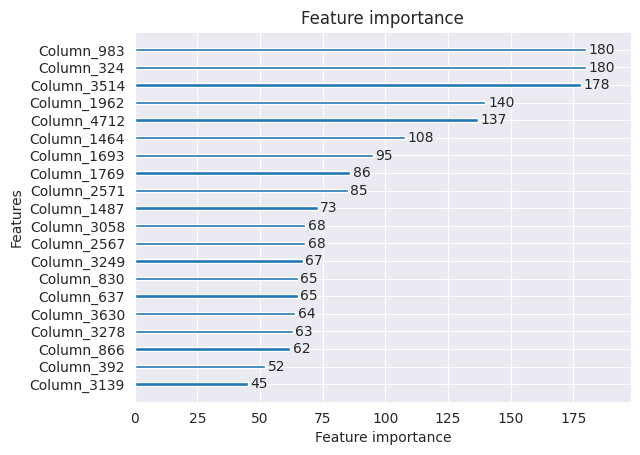

In [91]:
from lightgbm import plot_importance as pi
pi(booster=lgr,max_num_features=20)

In [94]:
from lightgbm import LGBMClassifier
import optuna

def objective_lgb(trial):
    """Define the objective function"""

    params = {
        'objective': trial.suggest_categorical('objective', ['binary']),
        #'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 15),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.01, 0.5),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 0.5),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 0.5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "random_state" : trial.suggest_categorical('random_state', [42]),
        #'num_leaves' : trial.suggest_int('num_leaves',2,6),
        #'eval_metric' : 'logloss'
    }


    model_lgb = LGBMClassifier(**params)
    model_lgb.fit(x_train, y_train)
    y_pred_prob = model_lgb.predict_proba(x_test)
    return log_loss(y_test,y_pred_prob)

In [93]:
!pip install optuna


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.4 MB/s eta 0:00:00


In [95]:
study_lgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.ERROR)
study_lgb.optimize(objective_lgb, n_trials=10,show_progress_bar=True)

[I 2024-01-06 10:25:25,775] A new study created in memory with name: no-name-599202ce-f76f-4498-bff7-7de757cdaf93


  0%|          | 0/10 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 4020, number of negative: 3981
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.902039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 355551
[LightGBM] [Info] Number of data points in the train set: 8001, number of used features: 4996
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502437 -> initscore=0.009749
[LightGBM] [Info] Start training from score 0.009749
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

In [96]:
lgb = LGBMClassifier(**study_lgb.best_params)
lgb.fit(x_train,y_train)
y_pred = lgb.predict_proba(x_test)
logloss = log_loss(y_test,y_pred)
print("LGM Boost loss value",logloss)

[LightGBM] [Info] Number of positive: 4020, number of negative: 3981
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.471426 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 355570
[LightGBM] [Info] Number of data points in the train set: 8001, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.502437 -> initscore=0.009749
[LightGBM] [Info] Start training from score 0.009749
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

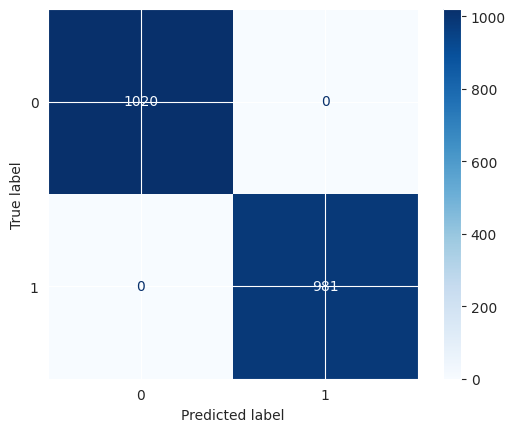

In [97]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lgb,x_test,y_test,cmap='Blues')

In [98]:
!pip install keras-core --upgrade
!pip install -q keras-nlp
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 24.3 MB/s eta 0:00:00


In [99]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import keras_core as keras
import keras_nlp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)
print("KerasNLP version:", keras_nlp.__version__)

Using TensorFlow backend
TensorFlow version: 2.15.0
Keras version: 0.1.7
KerasNLP version: 0.7.0


<Axes: ylabel='true_or_fake'>

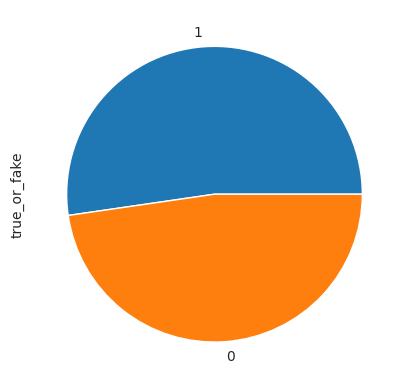

In [100]:
true['true_or_fake']=0
fake['true_or_fake']=1
df= pd.concat([fake, true], ignore_index=True)
df1 = df.sample(frac=1).reset_index(drop=True)
df1.true_or_fake.value_counts().plot(kind='pie')


In [101]:
SEQ_LENGTH = 512
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(
    "distil_bert_base_en_uncased",
    sequence_length=SEQ_LENGTH,
    # additional arguments if needed
)



INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/distil_bert/keras/distil_bert_base_en_uncased/2/download/tokenizer.json...
100%|██████████| 580/580 [00:00<00:00, 608kB/s]
INFO:kagglehub.clients:Downloading from https://www.kaggle.com/api/v1/models/keras/distil_bert/keras/distil_bert_base_en_uncased/2/download/assets/tokenizer/vocabulary.txt...
100%|██████████| 226k/226k [00:00<00:00, 1.36MB/s]


In [102]:
Preprocessor: "distil_bert_preprocessor"

In [103]:
from sklearn.model_selection import train_test_split
x_temp,x_test,y_temp,y_test = train_test_split(df1["text"],
                                               df1['true_or_fake'],
                                               test_size=0.30,
                                               random_state=42)
x_train,x_val,y_train,y_val = train_test_split(x_temp,y_temp,test_size=0.30,random_state=42)

In [110]:
def displayConfusionMatrix(y_true, y_pred, dataset):
    disp = ConfusionMatrixDisplay.from_predictions(
        y_true,
        np.argmax(y_pred, axis=1),
        display_labels=["true","fake"],
        cmap=plt.cm.Blues
    )
    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / (tp+((fn+fp)/2))
    disp.ax_.set_title("Confusion Matrix on " + dataset + " Dataset -- F1 Score: " + str(f1_score.round(2)))

In [132]:
#class CFG:
    sequence_length = 1024
    vocab_size = 10000

In [133]:
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
negative_df=pd.read_csv('/content/fake.csv')
negative_df['fake']=0.0
positive_df=pd.read_csv('/content/true.csv')
positive_df['true']=1.0
train_df=pd.concat([negative_df,positive_df])
train_df.head()

,title,text,subject,date,fake,true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0.0,NaN
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0.0,NaN
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0.0,NaN
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0.0,NaN
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0.0,NaN


<Axes: >

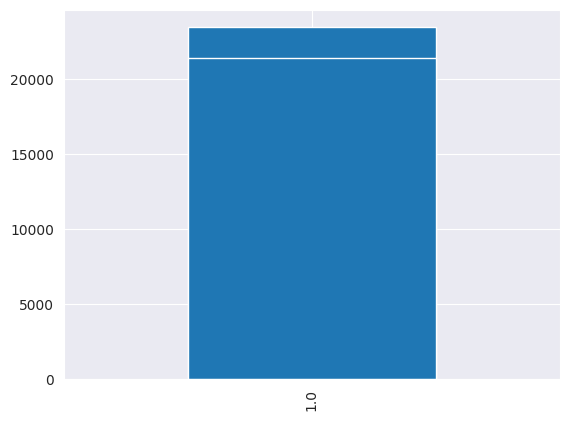

In [135]:
train_df.fake.value_counts().plot(kind="bar")
train_df.true.value_counts().plot(kind="bar")

In [136]:
train_df["title_length"] = train_df["title"].apply(lambda title: len(title.split(" ")))
train_df["text_length"] = train_df["text"].apply(lambda text: len(text.split(" ")))

In [137]:
train_df[["title_length", "text_length"]].describe()

,title_length,text_length
count,44898.000000,44898.000000
mean,12.657245,415.760412
std,4.170713,361.648003
min,1.000000,1.000000
25%,10.000000,208.000000
50%,12.000000,371.000000
75%,15.000000,525.000000
max,45.000000,8436.000000


<Axes: ylabel='Frequency'>

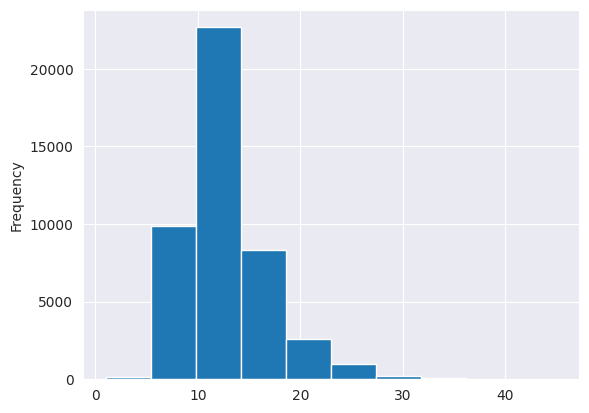

In [138]:
train_df["title_length"].plot(kind="hist")

In [142]:
 train_df["text_length"]

0        516
1        309
2        600
3        475
4        434
        ... 
21412    485
21413    134
21414    337
21415    213
21416    212
Name: text_length, Length: 44898, dtype: int64

<Axes: ylabel='Frequency'>

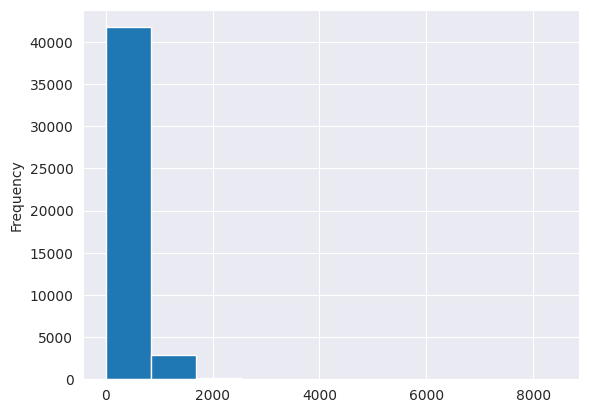

In [144]:
train_df["text_length"].plot(kind="hist")

In [160]:
train_data,valid_data = train_test_split(train_df,test_size=0.2,stratify=train_df["fake"],random_state=42)
train_data.shape,valid_data.shape

((18784, 8), (4697, 8))

In [152]:
print(train_df['fake'].isna().sum())


0


In [153]:
train_df = train_df.dropna(subset=['fake'])


In [154]:
mean_value = train_df['fake'].mean()
train_df['fake'].fillna(mean_value, inplace=True)


In [159]:
from sklearn.model_selection import train_test_split

train_data, valid_data = train_test_split(train_df, test_size=0.2, stratify=train_df["fake"], random_state=42)


In [162]:
def create_dataset(dataframe, shuffle=True):
    # Create a TensorFlow dataset from the text and fake columns of the dataframe
    dataset = tf.data.Dataset.from_tensor_slices((dataframe["text"], dataframe["fake"]))
    if shuffle:
         # Shuffle the dataset if the shuffle parameter is True
        dataset = dataset.shuffle(1024, reshuffle_each_iteration=True)
    # Batch the dataset into smaller batches of size 256
    dataset = dataset.batch(256).cache().prefetch(tf.data.AUTOTUNE)
    # Prefetch the next batch of data to further optimize training
    return dataset

In [163]:
train_ds = create_dataset(train_data)
valid_ds = create_dataset(valid_data,shuffle=True)

In [164]:
#Training the LSTM model
vectorizer = tf.keras.layers.TextVectorization(
    max_tokens=CFG.vocab_size,
    output_sequence_length=CFG.sequence_length,
    pad_to_max_tokens=True
)
vectorizer.adapt(train_df["text"],batch_size=1024)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 1024)              0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 1024, 64)          640000    
                                                                 
 bidirectional (Bidirection  (None, 1024, 128)         66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                        

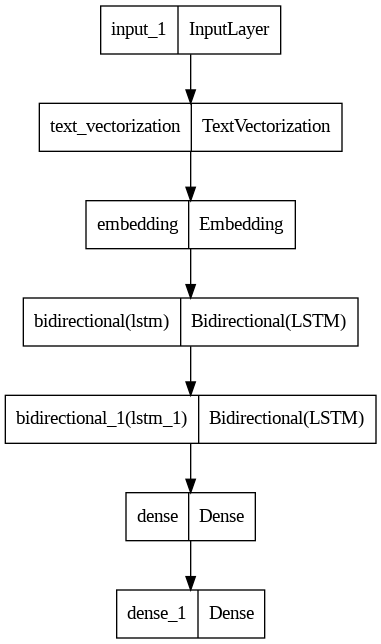

In [165]:
model=tf.keras.Sequential([
    tf.keras.layers.Input(shape=(),dtype=tf.string),
    vectorizer,
    tf.keras.layers.Embedding(
        input_dim=CFG.vocab_size,
        output_dim=64,
        input_length=CFG.sequence_length,
        mask_zero=True
    ),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        "accuracy",
        tf.keras.metrics.AUC(name="auc")
    ]
)
model.summary()
tf.keras.utils.plot_model(model)


In [166]:
file_path = "model.tf"
history = model.fit(
    train_ds,
    epochs=10 ,
    validation_data=valid_ds,
    callbacks=[
        tf.keras.callbacks.ModelCheckpoint(
            file_path,
            save_best_only=True,
            monitor='val_accuracy',
            mode='max'
        )
    ]
)

Epoch 1/10
74/74 [==============================] - 753s 10s/step - loss: 0.1184 - accuracy: 0.9963 - auc: 0.0000e+00 - val_loss: 0.0204 - val_accuracy: 1.0000 - val_auc: 0.0000e+00
Epoch 2/10
74/74 [==============================] - 643s 9s/step - loss: 0.0198 - accuracy: 1.0000 - auc: 0.0000e+00 - val_loss: 0.0196 - val_accuracy: 1.0000 - val_auc: 0.0000e+00
Epoch 3/10
74/74 [==============================] - 640s 9s/step - loss: 0.0187 - accuracy: 1.0000 - auc: 0.0000e+00 - val_loss: 0.0185 - val_accuracy: 1.0000 - val_auc: 0.0000e+00
Epoch 4/10
74/74 [==============================] - 643s 9s/step - loss: 0.0174 - accuracy: 1.0000 - auc: 0.0000e+00 - val_loss: 0.0171 - val_accuracy: 1.0000 - val_auc: 0.0000e+00
Epoch 5/10
74/74 [==============================] - 643s 9s/step - loss: 0.0159 - accuracy: 1.0000 - auc: 0.0000e+00 - val_loss: 0.0159 - val_accuracy: 1.0000 - val_auc: 0.0000e+00
Epoch 6/10
74/74 [==============================] - 645s 9s/step - loss: 0.0148 - accuracy: 1.

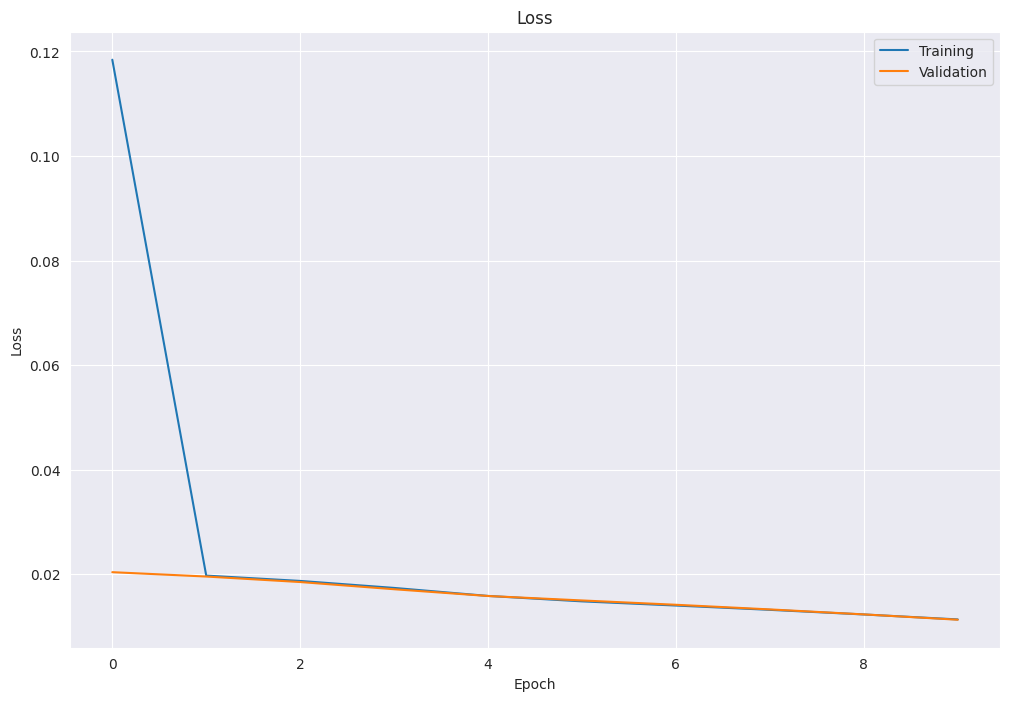

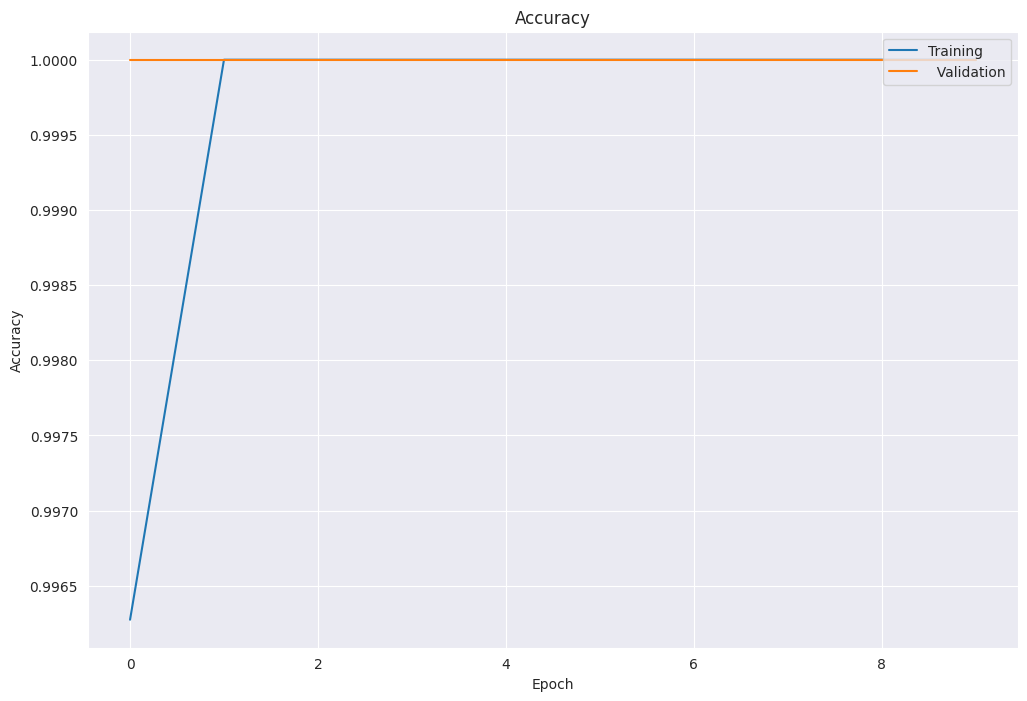

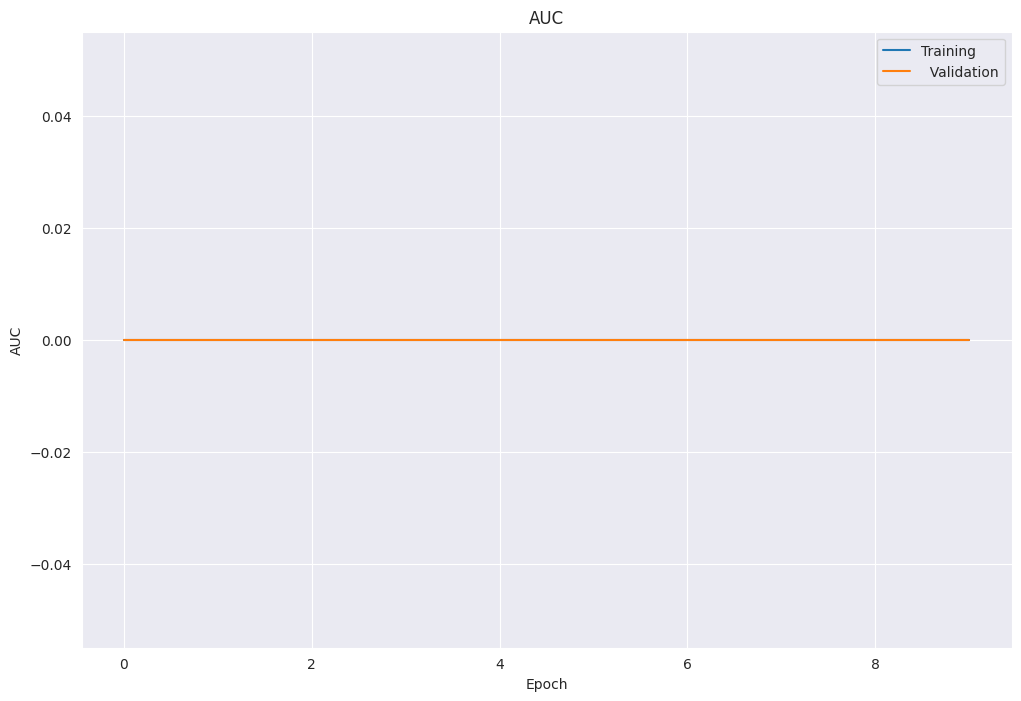

In [170]:
#plot learning curve
def plot_learning_curve(history):
  plt.figure(figsize=(12,8))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training','Validation'],loc='upper right')

  plt.figure(figsize=(12,8))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training','  Validation'],loc='upper right')

  plt.figure(figsize=(12,8))
  plt.plot(history.history['auc'])
  plt.plot(history.history['val_auc'])
  plt.title('AUC')
  plt.ylabel('AUC')
  plt.xlabel('Epoch')
  plt.legend(['Training','  Validation'],loc='upper right')
  plt.show()
plot_learning_curve(history)
